# Fitzhugh-Nagumo model

**Differential equations**
$$ \dot{V} = V-V^3-W+I$$
$$ \dot{W} = ε(V−aW+b) $$
$$ ε>0 $$

The Fitzhugh-Nagumo model of an excitable system is a two-dimensional simplification of the Hodgkin-Huxley model of spike generation in squid giant axons.  

$ I $  - external stimulus current  
$ V $  - membrane voltage (responds to external stimulus -  $ I $ )  
$ W $  - outward current (to move the system back to the equilibrium)

$ \varepsilon $  - recovery constant which is equal to $\frac{1}{\tau}$. Because $\tau$ us usually expressed in $ \mu s , ms$, then  $ 1 > \varepsilon > 0 $  



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#define function
def model(z,t,a,b,e,I):
    V,W=z
    dotV=V-V**3-W+I
    dotW=e*(V-a*W+b)
    return [dotV,dotW]

In [3]:
#simulation
def sim_model(initial_points,I,seconds):
           
    for i in I: 
        fig4, (ax1,ax2)=plt.subplots(1,2, figsize=(16,4))
        fig4.suptitle(f'Fitzhugh-Nagumo model at I={i}')
        ax1.set_xlabel('V')
        ax1.set_ylabel('W')
        ax1.set_title('Phase Space Plot')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('V')
        ax2.set_title('V Dynamics')
        ax2.set_xlim(0,seconds)
        
        sol_st=odeint(model,[-1,0],t,args=(a,b,e,i))
        sol_V_st=sol_st[:,0]
        sol_W_st=sol_st[:,1]
        ax1.plot(-1,0,label='Steady State -1,0', color='darkred',marker='o', linewidth=0) 
        
        for ini in initial_points:
            sol=odeint(model,ini,t,args=(a,b,e,i))
            sol_V=sol[:,0]
            sol_W=sol[:,1]
            ax1.plot(sol_V,sol_W,label=f'In.cond. {ini}')
            ax1.plot(ini[0],ini[1],marker='D', color='black')
            ax2.plot(t,sol_V, ls='dashed', label=f'In.cond. V={ini[0]}')
        
        fig4.legend(bbox_to_anchor=(1.1,0.9))
    plt.show()


Computed nullclines of this system for I=0, that are plotted in the VW-plane.  

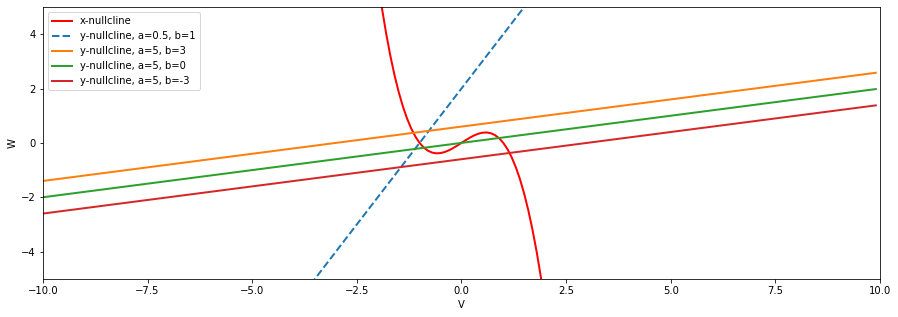

In [4]:
# plot of nullclines for I=0
V_for_null=np.arange(-10,10,0.1)

fig1, ax=plt.subplots(figsize=(15,5))#linewidth=1
# strm=ax.streamplot(V,W,dotV,dotW, linewidth=1, color=speed)
plt.plot(V_for_null,V_for_null-V_for_null**3, color='red', label='x-nullcline', linewidth=2)
plt.plot(V_for_null,(V_for_null+1)/0.5, label=f'y-nullcline, a=0.5, b=1', linewidth=2, linestyle='dashed')
plt.plot(V_for_null,(V_for_null+3)/5, label=f'y-nullcline, a=5, b=3', linewidth=2)
plt.plot(V_for_null,(V_for_null+0)/5, label=f'y-nullcline, a=5, b=0', linewidth=2)
plt.plot(V_for_null,(V_for_null-3)/5, label=f'y-nullcline, a=5, b=-3', linewidth=2)

plt.ylim(-5,5)
plt.xlim(-10,10)
ax.set_xlabel('V')
ax.set_ylabel('W')
plt.legend(loc='best')
# fig1.colorbar(strm.lines)
plt.show()


With certain parameters `a` and `b` up to 3 steady states are possible

Let's set $ a=0.5$  and  $ b=1 $  and verify that, in this case, there is only one steady state. You can interpret this as the ‘resting state’ condition of the neuron.

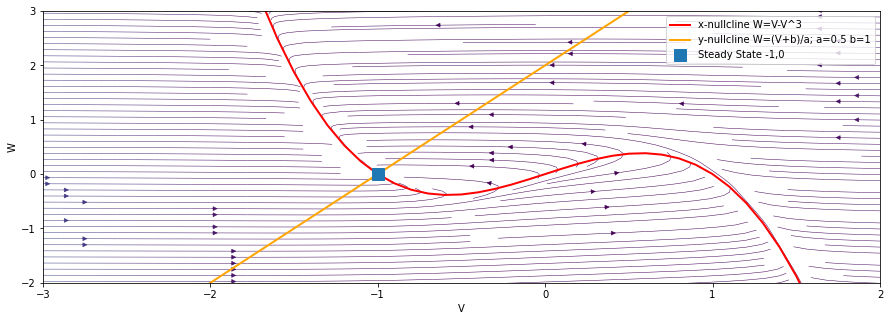

In [5]:
# set the parameters
I=0
a=0.5
b=1
e=0.1

# array for calculating nullclines
V_for_null=np.arange(-10,10,0.1)

# direction field
W,V=np.mgrid[-5:5:50j,-5:5:50j]
dotV=V-V**3-W+I
dotW=e*(V-a*W+b)
speed=np.sqrt(dotV*dotV+dotW*dotW)

# plot the nullclines
fig2, ax=plt.subplots(figsize=(15,5))#linewidth=1
strm=ax.streamplot(V,W,dotV,dotW, linewidth=0.5, color=speed,density=3)

plt.plot(V_for_null,V_for_null-V_for_null**3, color='red', label='x-nullcline W=V-V^3', linewidth=2)
plt.plot(V_for_null,(V_for_null+b)/a,color='orange', label=f'y-nullcline W=(V+b)/a; a=0.5 b=1', linewidth=2)
plt.plot(-1,0,label='Steady State -1,0', marker='s', markersize=12,linewidth=0)
# plt.plot(sol_V,sol_W, label='oscillations between the left and right branch of the x-nullcline')

plt.ylim(-2,3)
plt.xlim(-3,2)
ax.set_xlabel('V')
ax.set_ylabel('W')
plt.legend(loc='upper right')

plt.show()

Now let's compute numerical solutions of the system, plot the trajectories on the phase space and the function  $ V $  over time and think about the stability of the steady state

In [6]:
# set parameters
a=0.5
b=1
e=0.1
I=[0]

In [7]:
# set time
T=1000
nt=10000
t=np.linspace(0,T,nt)

In [8]:
# set initial conditions
initial_points=[[0,0],[-1,0.5],[-1.75, -0.75]]

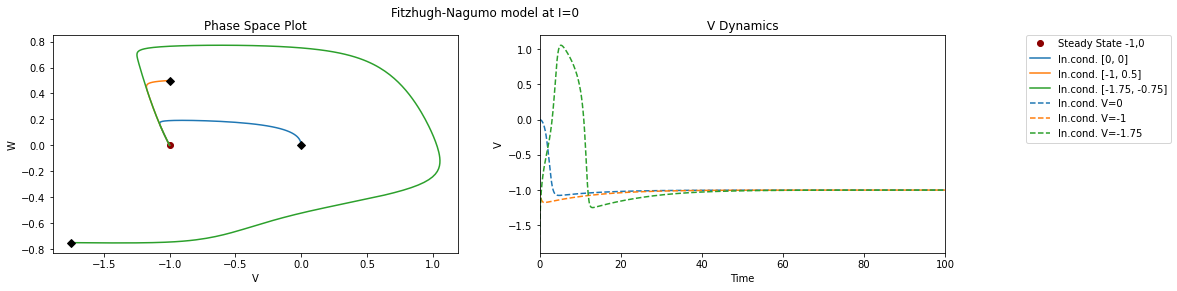

In [9]:
sim_model(initial_points,I,100)

Steady state  $ [-1,0] $  looks stable.

Based on stability analysis, made by hand, the steady state is stable node

In [10]:
# function that returns type of a steady state

def stability(jacobian):
    """ Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Use the eigenvalues. 
    Args:
        jacobian (np.array 2x2): the jacobian matrix at the equilibrium point.
    Return:
        (string) status of equilibrium point.
    """
    
    eigv = np.linalg.eigvals(jacobian)
    
    
    if all(np.real(eigv)==0) and all(np.imag(eigv)!=0):
        nature = "Center" 
    elif np.real(eigv)[0]*np.real(eigv)[1]<0:
        nature = "Saddle"
    else: 
        stability = 'Unstable' if all(np.real(eigv)>0) else 'Stable'
        nature = stability + (' focus' if all(np.imag(eigv)!=0) else ' node')
    return nature

In [11]:
stability([[-2,-1],[0.1,-0.05]])

'Stable node'

Now we'll play with parameters, e.g. increase the input current gradually to positive values

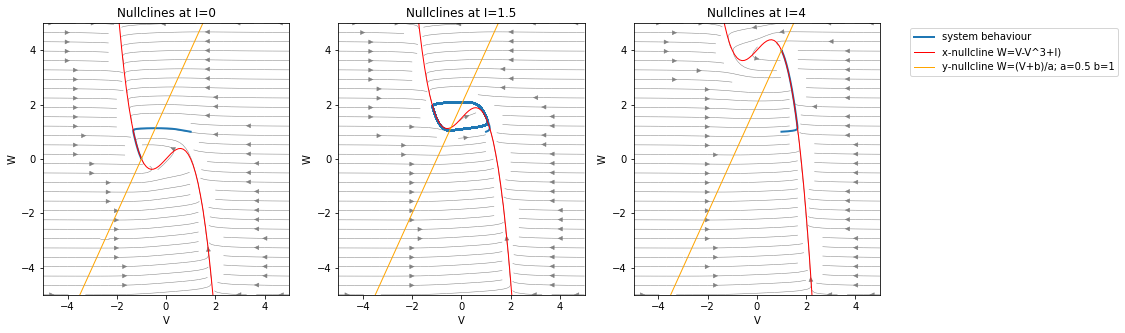

In [12]:
# only I varies

a=0.5
b=1
e=0.1
set_I=[0,1.5,4]

fig2, axes=plt.subplots(1,3, figsize=(15,5))#linewidth=1
ax=axes.ravel()
i=0

for I in set_I:
    sol=odeint(model,[1,1],t,args=(a,b,e,I))
    sol_V=sol[:,0]
    sol_W=sol[:,1]
    ax[i].plot(sol_V,sol_W, label='system behaviour',linewidth=2)
    
    V_for_null=np.arange(-10,10,0.1)
    W,V=np.mgrid[-5:5:50j,-5:5:50j]
    dotV=V-V**3-W+I
    dotW=e*(V-a*W+b)
    speed=np.sqrt(dotV*dotV+dotW*dotW)
    strm=ax[i].streamplot(V,W,dotV,dotW, linewidth=0.5, color='grey')
    ax[i].set_title(f'Nullclines at I={I}')
    ax[i].plot(V_for_null,V_for_null-V_for_null**3+I, color='red', label=f'x-nullcline W=V-V^3+I)', linewidth=1)
    ax[i].plot(V_for_null,(V_for_null+b)/a,color='orange', label=f'y-nullcline W=(V+b)/a; a={a} b={b}', linewidth=1)
#     plt.plot(-1,0,label='Steady State -1,0', marker='s', markersize=12,linewidth=0)

    ax[i].set_ylim(-5,5)
    ax[i].set_xlim(-5,5)
    ax[i].set_xlabel('V')
    ax[i].set_ylabel('W')
    i+=1
plt.legend(bbox_to_anchor=(1.1,1))
    # fig1.colorbar(strm.lines)
plt.show()

Increasing $ I $ leads to shifting up the cubic function curve.  
Intersection between nullclines also moves upwards - steady state is different for each  $ I $   
It is noticable that:
- when the intersection between nullclines is on the parts of cubic curve with *negative slope* - steady state is stable
- when the intersection is on the parts of cubic curve with *positive slope* - stable limit cycle appears

Continue to slowly increase  $ I $ .  

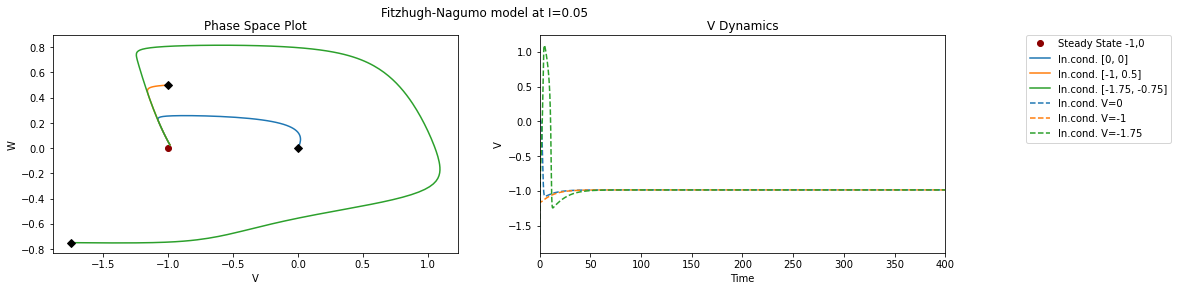

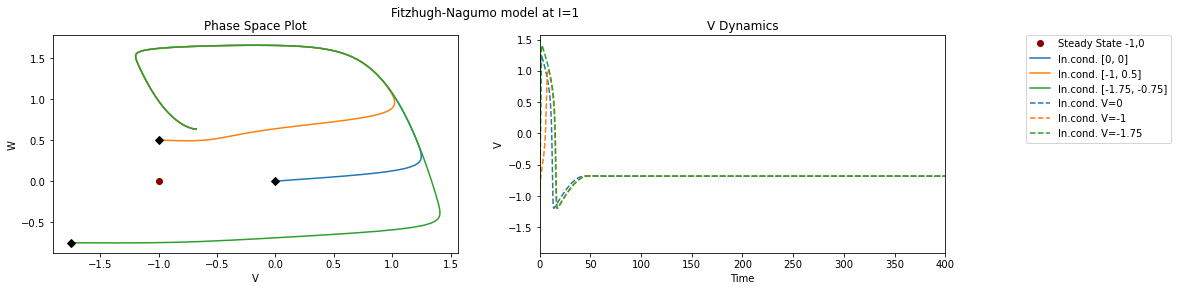

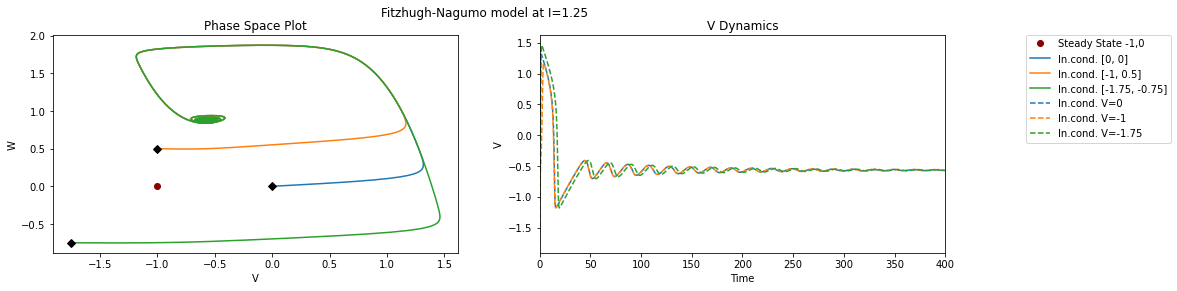

In [13]:
I=[0.05,1,1.25]
sim_model(initial_points,I,400)

When the values of  $ I $  are in range  from 0 to 1.25   the voltage  $ V $  tends to the steady state (which is different in each case).

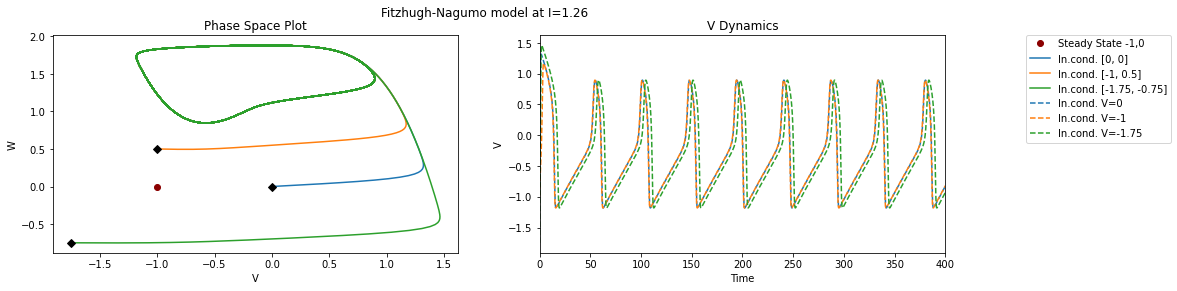

In [14]:
I=[1.26]
sim_model(initial_points,I,400)

However, when  $ I $  reaches  $ 1.26 $  it fires set of spikes, oscillations are observed
### First critical point is at I=1.26

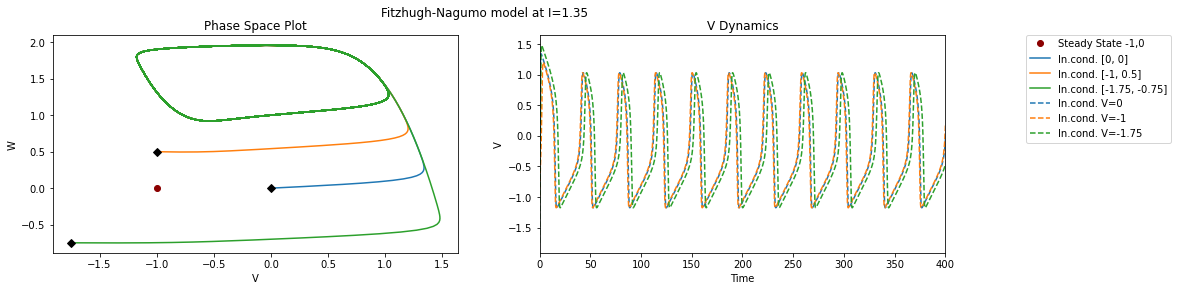

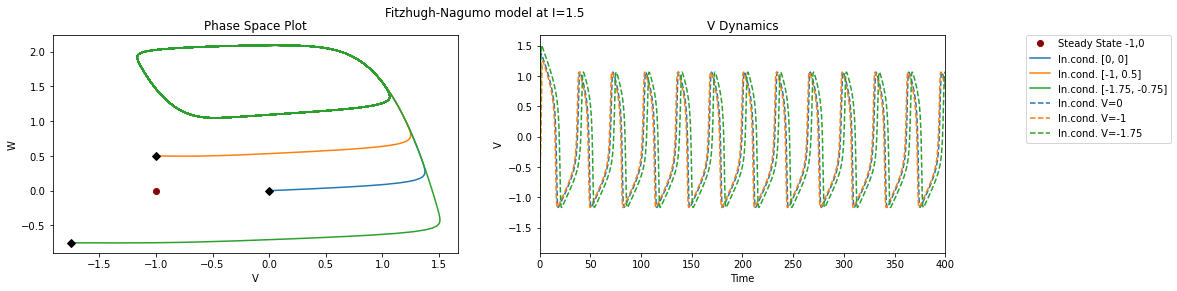

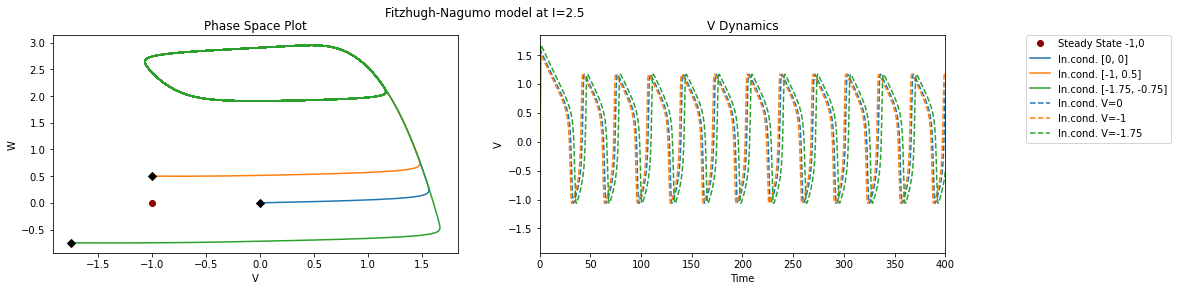

In [15]:
I=[1.35,1.5,2.5]
sim_model(initial_points,I,400)

The system oscillates further with increasing  $ I $  until it reaches the second critical point

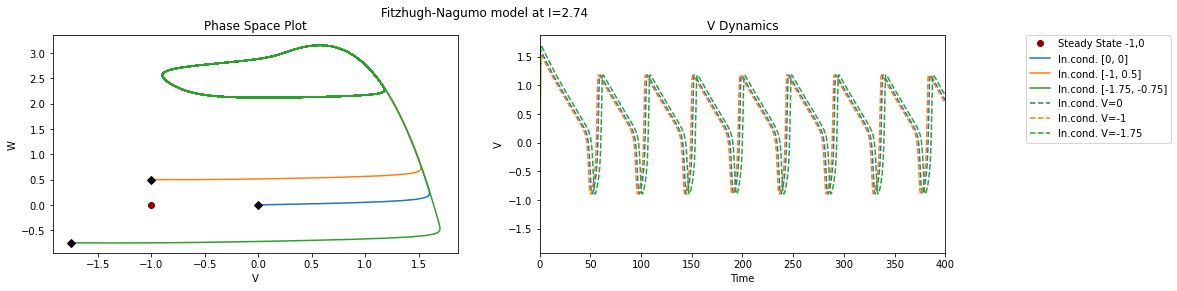

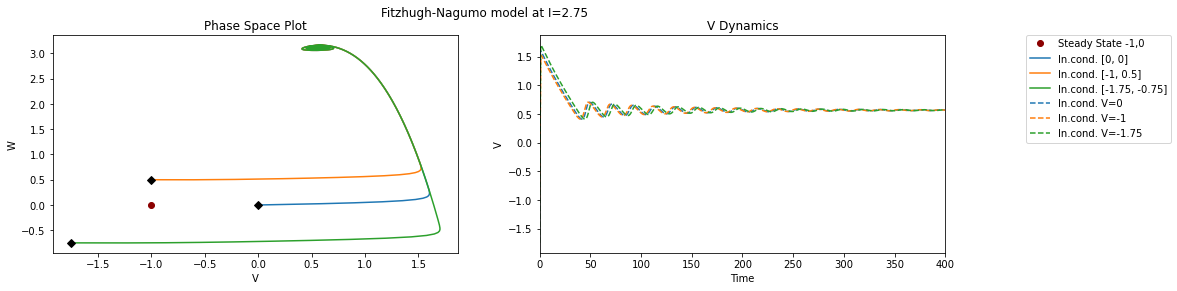

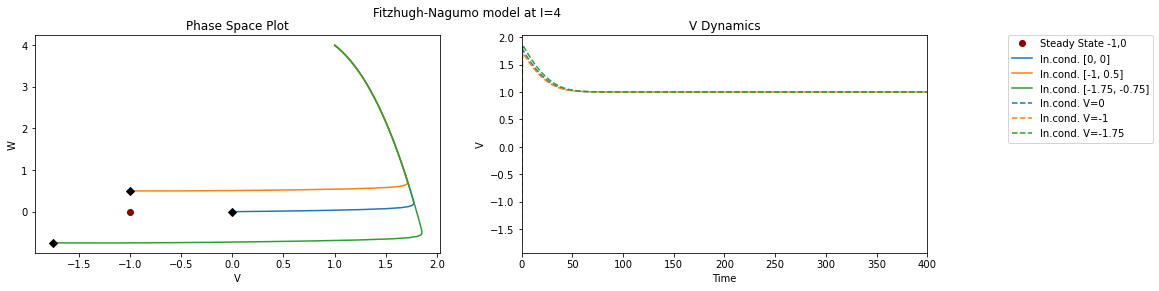

In [16]:
I=[2.74,2.75,4]
sim_model(initial_points,I,400)

Increasing current  $ I $  more leads to a new steady state again
### Second critical point is at I=2.74, after which limit cycle no longer exists

### In conclusion:

The neuron cell is initially at a resting potential value.  
Since resting potential is a stable state, after some small perturbations, the neuron will return to equilibrium.   
However if the external current  $ I $  is higher than a "threshold" value, the neuron fires a set of spikes, system enters a limit cycle and oscillatory pattern occurs. 
If the external current is too high, the spikes are blocked and no longer observed (excitation block)


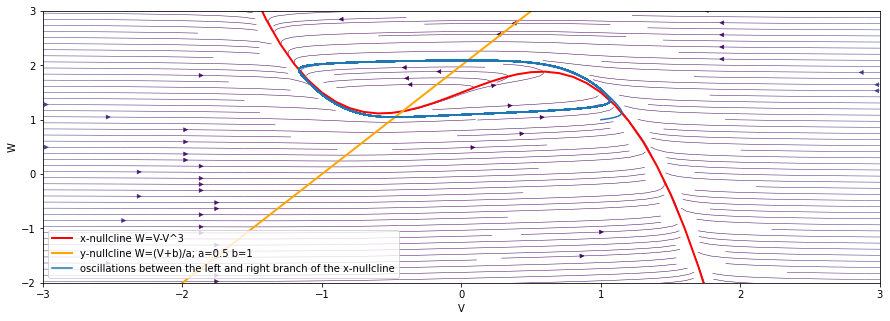

In [17]:
I=1.5
a=0.5
b=1
e=0.1

V_for_null=np.arange(-10,10,0.1)

# direction field
W,V=np.mgrid[-5:5:50j,-5:5:50j]
dotV=V-V**3-W+I
dotW=e*(V-a*W+b)
speed=np.sqrt(dotV*dotV+dotW*dotW)

sol=odeint(model,[1,1],t,args=(a,b,e,I))
sol_V=sol[:,0]
sol_W=sol[:,1]

fig2, ax=plt.subplots(figsize=(15,5))#linewidth=1
strm=ax.streamplot(V,W,dotV,dotW, linewidth=0.5, color=speed,density=3)

plt.plot(V_for_null,V_for_null-V_for_null**3+I, color='red', label='x-nullcline W=V-V^3', linewidth=2)
plt.plot(V_for_null,(V_for_null+b)/a,color='orange', label=f'y-nullcline W=(V+b)/a; a=0.5 b=1', linewidth=2)
plt.plot(sol_V,sol_W, label='oscillations between the left and right branch of the x-nullcline')

plt.ylim(-2,3)
plt.xlim(-3,3)
ax.set_xlabel('V')
ax.set_ylabel('W')
plt.legend(loc='lower left')
plt.show()